In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('D:\\WTS projects\\student prediction\\data\\realistic_student_placement_data.csv')


In [18]:
df.head()

,cgpa,iq,placement
0,5.00,116,1
1,9.61,81,1
2,7.86,131,1
3,6.79,149,1
4,3.25,157,1


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('placement', axis=1),
                                                    df['placement'],
                                                    test_size=0.2)

X_train.shape, X_test.shape

((800, 2), (200, 2))

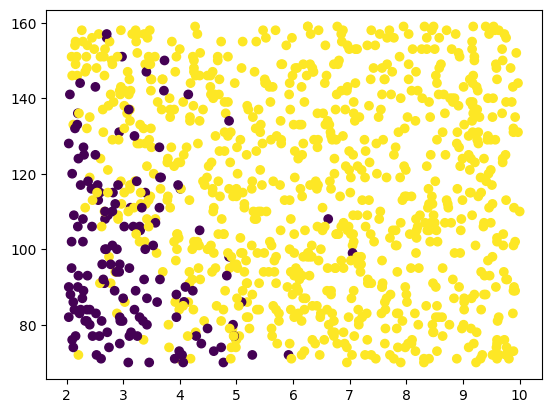

In [20]:
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])


In [21]:
from sklearn.preprocessing import StandardScaler


In [22]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
scaler.mean_

array([  5.9595125, 113.55875  ])

In [24]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [25]:
np.round(X_train.describe(), 1)

,cgpa,iq
count,800.0,800.0
mean,6.0,113.6
std,2.3,25.7
min,2.0,70.0
25%,3.9,91.0
50%,6.0,113.0
75%,8.0,136.0
max,10.0,159.0


In [26]:
np.round(X_train_scaled.describe(), 1)

,cgpa,iq
count,800.0,800.0
mean,-0.0,-0.0
std,1.0,1.0
min,-1.7,-1.7
25%,-0.9,-0.9
50%,0.0,-0.0
75%,0.9,0.9
max,1.7,1.8


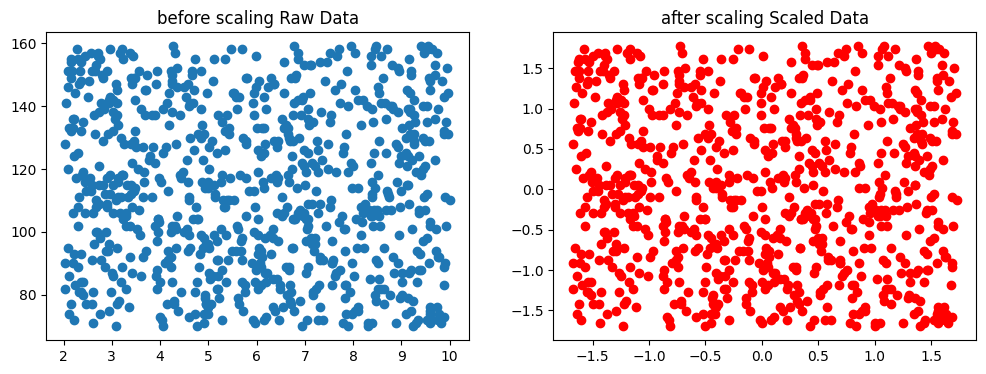

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.scatter(X_train['cgpa'], X_train['iq'])
ax1.set_title('before scaling Raw Data')
ax2.scatter(X_train_scaled['cgpa'], X_train_scaled['iq'], color='red')
ax2.set_title('after scaling Scaled Data')
plt.show()

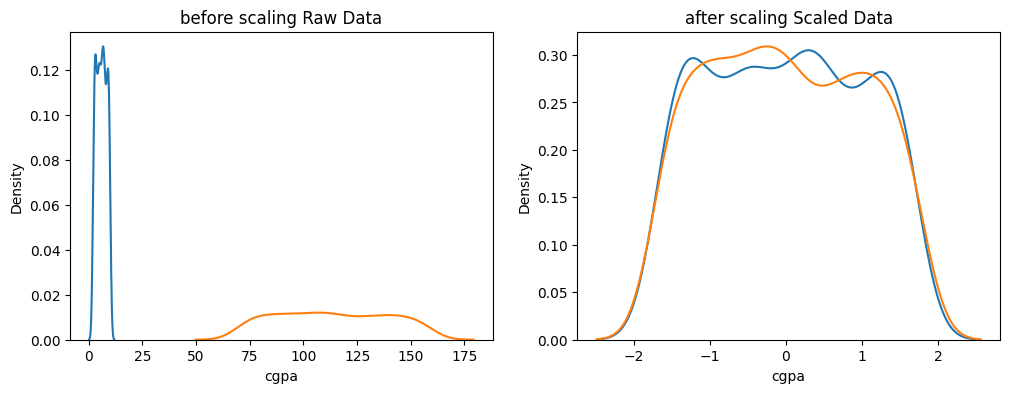

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))

ax1.set_title('before scaling Raw Data')
sns.kdeplot(X_train['cgpa'], ax=ax1)
sns.kdeplot(X_train['iq'], ax=ax1)

ax2.set_title('after scaling Scaled Data')
sns.kdeplot(X_train_scaled['cgpa'], ax=ax2)
sns.kdeplot(X_train_scaled['iq'], ax=ax2)

plt.show()

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression()
clf_scaled = LogisticRegression()

In [31]:
clf.fit(X_train,y_train)
clf_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [32]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [33]:
X_test

,cgpa,iq
879,3.78,113
943,8.64,131
695,6.88,158
435,7.61,145
89,5.78,134
...,...,...
102,4.51,122
922,9.16,153
478,9.75,125
310,5.51,144


In [34]:
y_pred = clf.predict(X_test)
y_pred_sacled = clf_scaled.predict(X_test_scaled)

In [35]:
from sklearn.metrics import accuracy_score

print("Actual", accuracy_score(y_test,y_pred))
print("Scaled", accuracy_score(y_test,y_pred_sacled))

Actual 0.915
Scaled 0.91


In [37]:
from mlxtend.plotting import plot_decision_regions

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


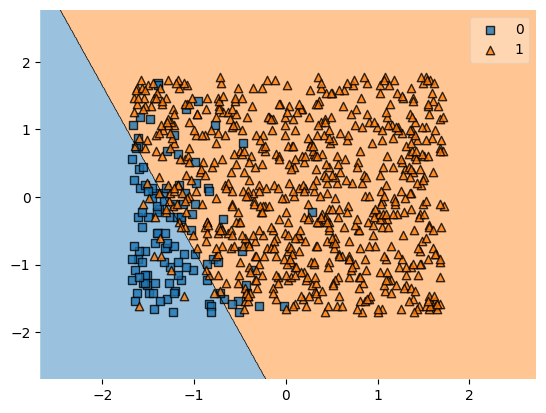

In [38]:
plot_decision_regions(X_train_scaled.values, y_train.values, clf=clf_scaled)
plt.show()

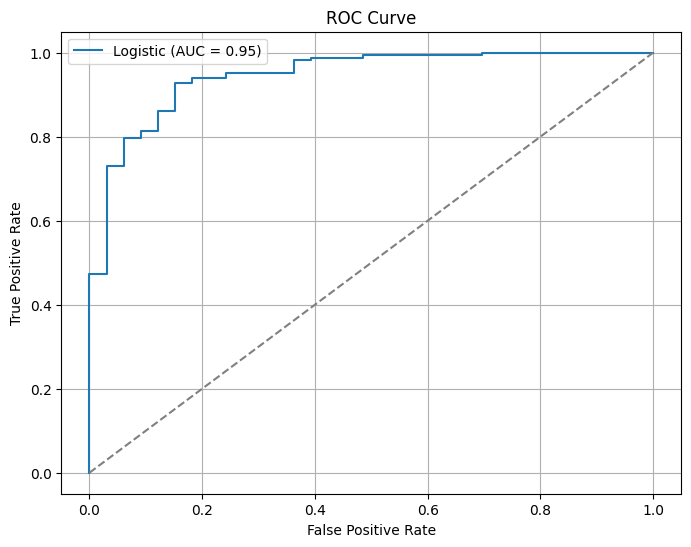

✅ Best Threshold (Youden's J): 0.63


In [39]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities (only for class 1)
y_proba = clf_scaled.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold using Youden's J statistic
youden_index = tpr - fpr
best_threshold = thresholds[np.argmax(youden_index)]

print(f"✅ Best Threshold (Youden's J): {best_threshold:.2f}")


In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Classify based on the best threshold
y_pred_optimal = (y_proba >= best_threshold).astype(int)

# Evaluate performance
print("🔍 Confusion Matrix at Optimal Threshold:")
print(confusion_matrix(y_test, y_pred_optimal))

print("\n📊 Classification Report at Optimal Threshold:")
print(classification_report(y_test, y_pred_optimal))

# Compare with original threshold = 0.5
print("\n🔁 Classification Report at Default Threshold (0.5):")
print(classification_report(y_test, (y_proba >= 0.5).astype(int)))


🔍 Confusion Matrix at Optimal Threshold:
[[ 28   5]
 [ 12 155]]

📊 Classification Report at Optimal Threshold:
              precision    recall  f1-score   support

           0       0.70      0.85      0.77        33
           1       0.97      0.93      0.95       167

    accuracy                           0.92       200
   macro avg       0.83      0.89      0.86       200
weighted avg       0.92      0.92      0.92       200


🔁 Classification Report at Default Threshold (0.5):
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        33
           1       0.94      0.95      0.95       167

    accuracy                           0.91       200
   macro avg       0.84      0.82      0.83       200
weighted avg       0.91      0.91      0.91       200



In [41]:
# Create a DataFrame to show results
results_df = X_test.copy()  # Start with the test features
results_df['Actual Placement'] = y_test.values
results_df['Predicted Placement'] = y_pred_optimal  # From optimal threshold

# Optional: Reset index if needed
results_df.reset_index(drop=True, inplace=True)

# Display top 10 records
results_df.head(10)


,cgpa,iq,Actual Placement,Predicted Placement
0,3.78,113,1,1
1,8.64,131,1,1
2,6.88,158,1,1
3,7.61,145,1,1
4,5.78,134,1,1
5,3.12,137,1,1
6,7.62,75,1,1
7,8.50,153,1,1
8,3.82,140,1,1
9,7.66,149,1,1


In [42]:
# Create base DataFrame
results_df = X_test.copy()
results_df['Actual Placement'] = y_test.values
results_df['Predicted Probability'] = y_proba

# Predictions using default threshold (0.5)
results_df['Predicted@0.5'] = (y_proba >= 0.5).astype(int)

# Predictions using best threshold
results_df['Predicted@Best'] = y_pred_optimal

# Whether predictions match actual
results_df['Correct@0.5'] = results_df['Actual Placement'] == results_df['Predicted@0.5']
results_df['Correct@Best'] = results_df['Actual Placement'] == results_df['Predicted@Best']

# Mark which threshold each row used (for analysis or explanation)
results_df['Threshold Used'] = np.where(results_df['Predicted@0.5'] == results_df['Predicted@Best'],
                                        f"Same ({best_threshold:.2f})",
                                        f"Diff (0.5 vs {best_threshold:.2f})")

# Optional: Cleanup or formatting
results_df = results_df.rename(columns={
    'Predicted@0.5': 'Predicted (0.5)',
    'Predicted@Best': f'Predicted ({best_threshold:.2f})',
    'Correct@0.5': 'Correct (0.5)',
    'Correct@Best': f'Correct ({best_threshold:.2f})'
})

# Show top 10 mismatches between 0.5 and best
mismatches = results_df[results_df['Predicted (0.5)'] != results_df[f'Predicted ({best_threshold:.2f})']]
print("🔁 Mismatches between default and best threshold:", len(mismatches))
display(mismatches.head(10))




# Display top 10 full results
pd.set_option('display.max_rows', None)  # Shows all rows
display(results_df)


🔁 Mismatches between default and best threshold: 9


,cgpa,iq,Actual Placement,Predicted Probability,Predicted (0.5),Predicted (0.63),Correct (0.5),Correct (0.63),Threshold Used
68,2.60,124,1,0.544680,1,0,True,False,Diff (0.5 vs 0.63)
638,4.15,86,1,0.589608,1,0,True,False,Diff (0.5 vs 0.63)
44,4.07,86,0,0.562044,1,0,False,True,Diff (0.5 vs 0.63)
929,4.06,85,1,0.545527,1,0,True,False,Diff (0.5 vs 0.63)
83,2.51,125,0,0.526211,1,0,False,True,Diff (0.5 vs 0.63)
908,4.08,86,0,0.565514,1,0,False,True,Diff (0.5 vs 0.63)
721,3.45,106,1,0.605715,1,0,True,False,Diff (0.5 vs 0.63)
670,3.39,100,0,0.507064,1,0,False,True,Diff (0.5 vs 0.63)
84,4.49,79,0,0.616082,1,0,False,True,Diff (0.5 vs 0.63)


,cgpa,iq,Actual Placement,Predicted Probability,Predicted (0.5),Predicted (0.63),Correct (0.5),Correct (0.63),Threshold Used
879,3.78,113,1,0.779737,1,1,True,True,Same (0.63)
943,8.64,131,1,0.999885,1,1,True,True,Same (0.63)
695,6.88,158,1,0.999668,1,1,True,True,Same (0.63)
435,7.61,145,1,0.999765,1,1,True,True,Same (0.63)
89,5.78,134,1,0.994479,1,1,True,True,Same (0.63)
262,3.12,137,1,0.831810,1,1,True,True,Same (0.63)
137,7.62,75,1,0.990793,1,1,True,True,Same (0.63)
444,8.50,153,1,0.999956,1,1,True,True,Same (0.63)
124,3.82,140,1,0.939599,1,1,True,True,Same (0.63)
800,7.66,149,1,0.999823,1,1,True,True,Same (0.63)


In [43]:
from sklearn.metrics import confusion_matrix

def get_confusion_details(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return {
        'TP': tp,
        'FP': fp,
        'FN': fn,
        'TN': tn
    }

# Get predictions
y_pred_05 = results_df['Predicted (0.5)']
y_pred_best = results_df[f'Predicted ({best_threshold:.2f})']

# Actual values
y_true = results_df['Actual Placement']

# Compute confusion matrix details
cm_05 = get_confusion_details(y_true, y_pred_05)
cm_best = get_confusion_details(y_true, y_pred_best)

# Display results
print("📊 Confusion Matrix Metrics:")

print("\n🔘 Threshold = 0.5")
for k, v in cm_05.items():
    print(f"{k}: {v}")

print(f"\n🟢 Threshold = {best_threshold:.2f}")
for k, v in cm_best.items():
    print(f"{k}: {v}")


📊 Confusion Matrix Metrics:

🔘 Threshold = 0.5
TP: 159
FP: 10
FN: 8
TN: 23

🟢 Threshold = 0.63
TP: 155
FP: 5
FN: 12
TN: 28
